# Sampling with Negative Binomial Distribution

Recall the following details of the Negative Binomial Distribution pdf:

Given the following values:
- $n$ indicates the number of trials.
- $k$ indicates the number of successes needed for overall success.
- $p$ indicates the probability of success.
- $q=1-p$ indicates the probability of failure.
- $X$ represents the number of the last well drilled to achieve overall success.

The <span style = 'color: blue; font-weight:bold'>closed form pdf for a negative binomial distribution</span> is as follows:

$$P(X=x) = \binom{n-1}{k-1}p^kq^{n-k}$$

## The rflip() Function

We need to be able to use **rflip()** inside our **while loop.**

In [1]:
rflip <- function(n=1, prob=.5, quiet=FALSE, verbose = !quiet, summarize = FALSE, 
                  summarise = summarize) {
	if ( ( prob > 1 && is.integer(prob) ) ) {  
		# swap n and prob
		temp <- prob
		prob <- n
		n <- temp
	}
	if (summarise) {
	  heads <- rbinom(1, n, prob)
	  return(data.frame(n = n, heads = heads, tails = n - heads, prob = prob))
	} else {
	  r <- rbinom(n,1,prob)
	  result <- c('T','H')[ 1 + r ]
	  heads <- sum(r)
	  attr(heads,"n") <- n
	  attr(heads,"prob") <- prob 
	  attr(heads,"sequence") <- result
	  attr(heads,"verbose") <- verbose
	  class(heads) <- 'cointoss'
	  return(heads)
	}
}

The expected value is given below:

$$E(X) = \frac{k}{p}$$

Oil fields: 25\% chance of successes

$$E(X) = \frac{3}{\frac{1}{4}} = 12$$

In [2]:
k <- 0     # Initialize number of successes index
n <- 0     # Initialize number of total trials needed for success to occur
while (k < 3 && n < 20) {
   k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
   n <- n + 1
}
n

[1] 8

**Now we can run the for loop with $k=100$.**

The grand mean of the number of trials needed to achieve success is equal to
    11.1

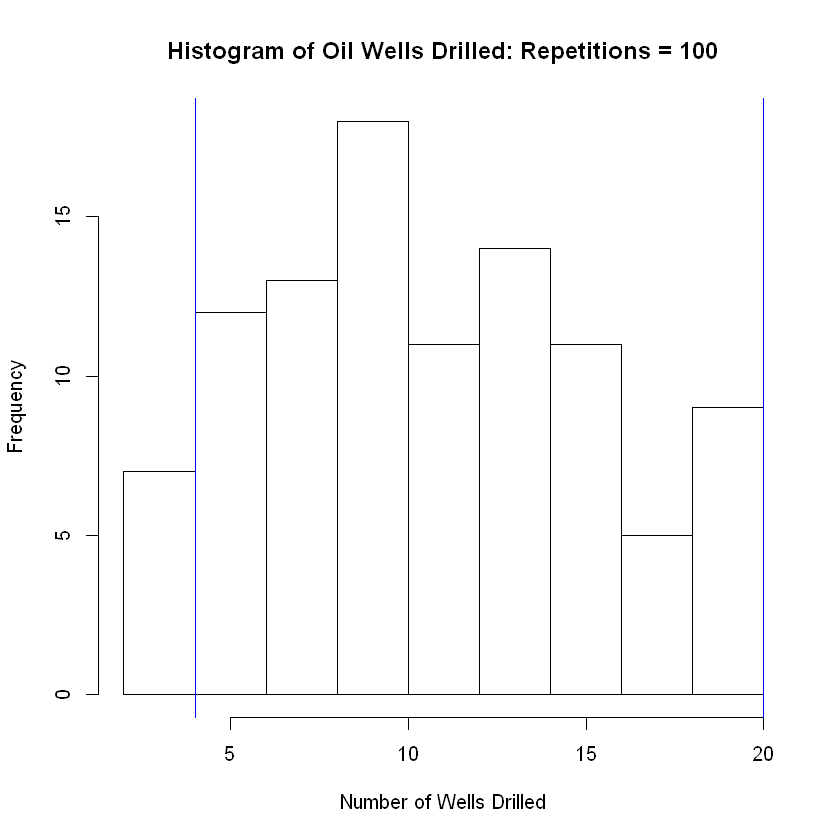

In [3]:
num_trials_needed <- c()     # create a vector to store the number of trials needed in while loop
num_samps = 100              # set the number of times to run the simulation

for (i in 1:num_samps){
    k <- 0     # Initialize number of successes index
    n <- 0     # Initialize number of total trials needed for success to occur
    while (k < 3 && n < 20) {
        k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
        n <- n + 1
    }
    num_trials_needed[i] <- n     # store the number of trials need in this simulation
}

lower <- quantile(num_trials_needed, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_trials_needed, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the number of trials needed to achieve success is equal to\n   ',mean(num_trials_needed) )
hist(num_trials_needed, breaks = 8, main = 'Histogram of Oil Wells Drilled: Repetitions = 100', xlab = 'Number of Wells Drilled')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

This table summarizes the investigation to include five examples from the sampling distribution of Drawing a Spades hand:

<table class="center" style="width:70%; text-align:center;">
  <tr>
    <th>Max Number of Wells Drilled</th>
    <th>p = 1/4</th> 
    <th>E(X)</th>
    <th>Simulation Grand Mean</th>
  </tr>
  <tr>
    <td>100</td>
    <td>0.25</td>
    <td>12</td>
    <td>11.77</td>
  </tr>
  <tr>
    <td>200</td>
    <td>0.25</td>
    <td>12</td>
    <td>11.865</td>
  </tr>
  <tr>
    <td>500</td>
    <td>0.25</td>
    <td>12</td>
    <td>11.68</td>
  </tr>
  <tr>
    <td>1,000</td>
    <td>0.25</td>
    <td>12</td>
    <td>11.569</td>
  </tr>
  <tr>

The grand mean of the number of trials needed to achieve success is equal to
    11.125

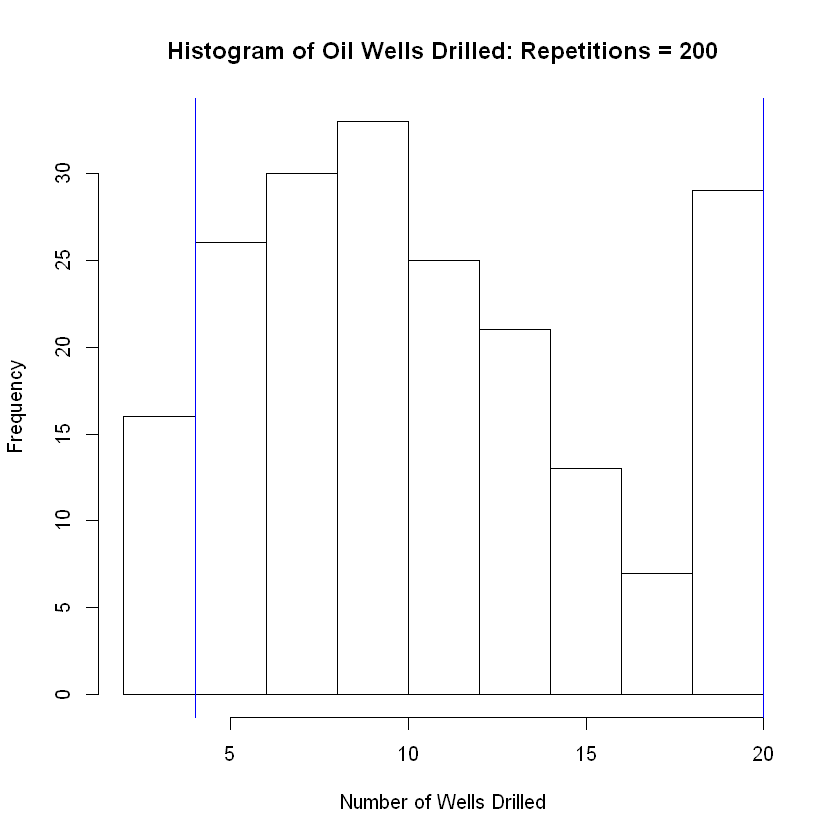

In [4]:
num_trials_needed <- c()     # create a vector to store the number of trials needed in while loop
num_samps = 200              # set the number of times to run the simulation

for (i in 1:num_samps){
    k <- 0     # Initialize number of successes index
    n <- 0     # Initialize number of total trials needed for success to occur
    while (k < 3 && n < 20) {
        k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
        n <- n + 1
    }
    num_trials_needed[i] <- n     # store the number of trials need in this simulation
}

lower <- quantile(num_trials_needed, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_trials_needed, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the number of trials needed to achieve success is equal to\n   ',mean(num_trials_needed) )
hist(num_trials_needed, breaks = 8, main = 'Histogram of Oil Wells Drilled: Repetitions = 200', xlab = 'Number of Wells Drilled')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The grand mean of the number of trials needed to achieve success is equal to
    11.69

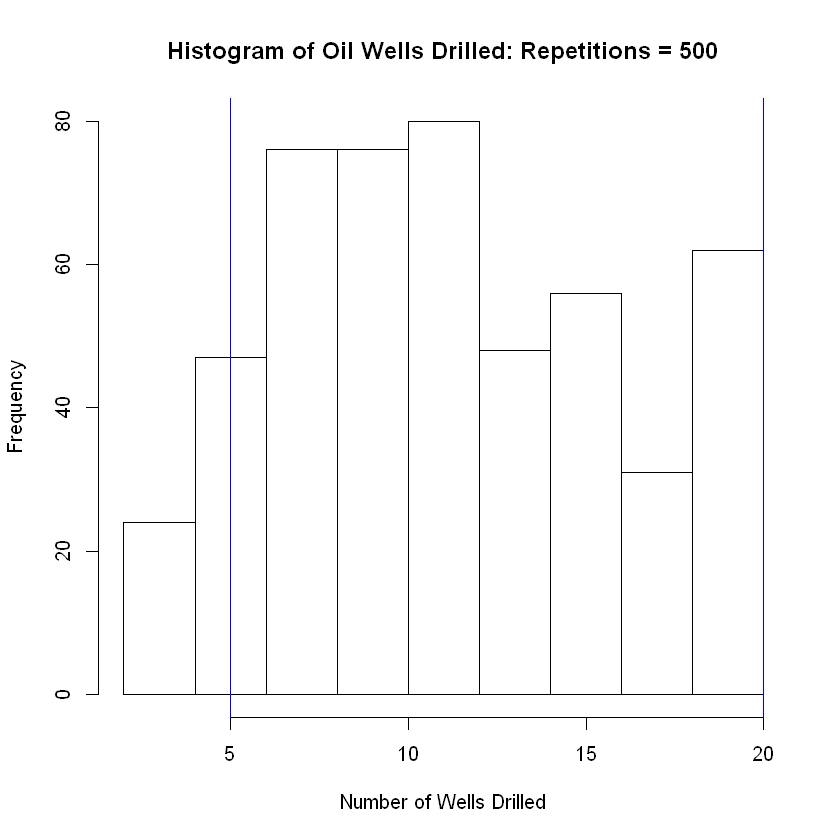

In [5]:
num_trials_needed <- c()     # create a vector to store the number of trials needed in while loop
num_samps = 500              # set the number of times to run the simulation

for (i in 1:num_samps){
    k <- 0     # Initialize number of successes index
    n <- 0     # Initialize number of total trials needed for success to occur
    while (k < 3 && n < 20) {
        k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
        n <- n + 1
    }
    num_trials_needed[i] <- n     # store the number of trials need in this simulation
}

lower <- quantile(num_trials_needed, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_trials_needed, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the number of trials needed to achieve success is equal to\n   ',mean(num_trials_needed) )
hist(num_trials_needed, breaks = 8, main = 'Histogram of Oil Wells Drilled: Repetitions = 500', xlab = 'Number of Wells Drilled')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The grand mean of the number of trials needed to achieve success is equal to
    11.597

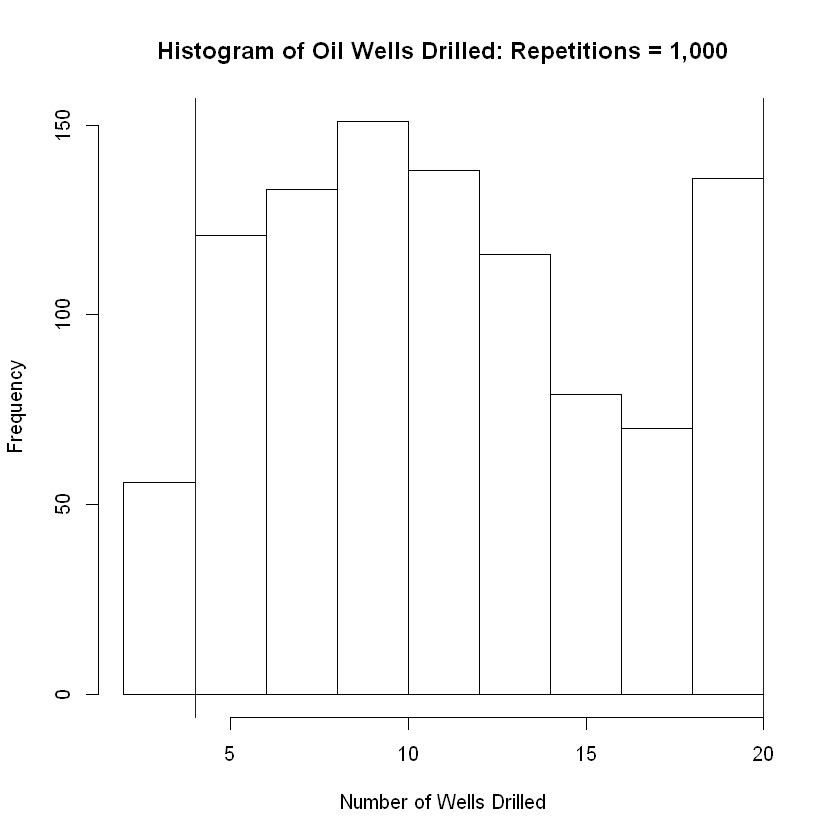

In [6]:
num_trials_needed <- c()     # create a vector to store the number of trials needed in while loop
num_samps = 1000              # set the number of times to run the simulation

for (i in 1:num_samps){
    k <- 0     # Initialize number of successes index
    n <- 0     # Initialize number of total trials needed for success to occur
    while (k < 3 && n < 20) {
        k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
        n <- n + 1
    }
    num_trials_needed[i] <- n     # store the number of trials need in this simulation
}

lower <- quantile(num_trials_needed, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_trials_needed, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the number of trials needed to achieve success is equal to\n   ',mean(num_trials_needed) )
hist(num_trials_needed, breaks = 8, main = 'Histogram of Oil Wells Drilled: Repetitions = 1,000', xlab = 'Number of Wells Drilled')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The simulated distribution is not quite accurate because, in a good programming move, we have dissallowed a possible infinite loop. We have coded in both the "number of successes" stopping criteria along with a "max oil wells drilled equals 20" stopping criteria. This second stoppinng criteria creates a second mode at n = 20 which skews the results slightly.

However, we have little choice. Programming a possible infinite loop invites much frustration when, as often happens, something goes wrong inside the infinite loop. The code is likely to hang up, throw an error or spin forever trying to execute the loop. Our fail-safe stopping criteria of "max 20 oil wells" does skew things slightly, but the alternatives are worse.